# **Sesión 1:** Calibración de Cámara 📷⚙️

## **Instalaciones**

In [1]:
!pip install imageio opencv-python


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Librerías**

In [2]:
from typing import List
import numpy as np
import imageio
import cv2
import copy
import glob

## **Apartado A: Calibración de cámara** (derecha e izquierda)

En este apartado se realiza la calibración de dos cámaras de un sistema estereoscópico. Para ello se trabajará con las imágenes de las carpetas ``left`` y ``right``. En primer lugar se trabajará con la carpeta ``left``. Posteriormente, deberá repetir el proceso con las imágenes en la carpeta ``right``. Ambas carpetas contienen imágenes con las que se calibrarán las cámaras. En ellas aparece el patrón de calibración en diferentes posiciones y orientaciones. Estas imágenes serán los datos de entrada.

Los pasos que deberá seguir para calibrar una cámara son:

1. Defina y ejecute el método para cargar imágenes ``load_images()``.
2. Detecte las esquinas de los patrones usando ``cv2.findChessboardCorners()``. Refine las detecciones con ``cv2.cornerSubPix()``.
3. Compruebe que las detecciones son correctas dibujando los resultados con ``cv2.drawChessboardCorners()``.
4. Defina y ejecute el método ``get_chessboard_points(chessboard_shape, dx, dy)`` que proporcione las coordenadas 3D de las esquinas del patrón. El sistema de referencia utilizado deberá estar anclado al propio patrón.
5. Utilice ``cv2.calibrateCamera`` para obtener los parámetros de calibración para la cámara izquierda.

### **Tarea A.1:** Defina y ejecute el método para cargar imágenes ``load_images()``.

In [3]:
def load_images(filenames: List) -> List:
    return [imageio.imread(filename) for filename in filenames]

In [4]:
# TODO Build a list containing the paths of all images from the left camera
import os 
from os.path import dirname, join

path = join(dirname(os.getcwd()), "data", "left")
print(path)
imgs_path = [join(path, f"{img_path}") for img_path in os.listdir(path)]

imgs = load_images(imgs_path)

c:\Users\matte\OneDrive\Escritorio\3IMAT\Vision_por_ordenador\Laboratorio\Practica1\Lab_1\data\left


### **Tarea A.2:** Detecte las esquinas de los patrones usando ``cv2.findChessboardCorners()``. Refine las detecciones con ``cv2.cornerSubPix()``.

In [5]:
# TODO Find corners with cv2.findChessboardCorners()
corners = []
for img in imgs:
    corner = cv2.findChessboardCorners(img, (8, 6))
    corners.append(corner)

In [6]:
print(corners)


[(True, array([[[131.43307 , 104.00123 ]],

       [[148.9144  , 100.84694 ]],

       [[165.05333 ,  97.97289 ]],

       [[180.25166 ,  95.31656 ]],

       [[194.51035 ,  92.77069 ]],

       [[207.45236 ,  90.59085 ]],

       [[219.75256 ,  88.641045]],

       [[230.77058 ,  86.615425]],

       [[146.1329  , 118.54005 ]],

       [[163.63858 , 114.80844 ]],

       [[179.6695  , 111.347565]],

       [[194.63861 , 108.0987  ]],

       [[208.57974 , 105.05683 ]],

       [[221.35004 , 102.328636]],

       [[233.39177 ,  99.78516 ]],

       [[244.47313 ,  97.41812 ]],

       [[161.75565 , 133.98476 ]],

       [[178.84393 , 129.54866 ]],

       [[194.81929 , 125.410164]],

       [[209.61554 , 121.65416 ]],

       [[223.40468 , 118.13299 ]],

       [[235.87726 , 114.681465]],

       [[247.90225 , 111.664894]],

       [[258.57294 , 108.960365]],

       [[178.23653 , 150.39395 ]],

       [[195.195   , 145.15868 ]],

       [[210.98201 , 140.22604 ]],

       [[225.52065 ,

In [7]:
corners_copy = copy.deepcopy(corners)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

# TODO To refine corner detections with cv2.cornerSubPix() you need to input grayscale images. Build a list containing grayscale images.
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs] 

corners_refined = [cv2.cornerSubPix(i, cor[1], (8, 6), (-1, -1), criteria) if cor[0] else [] for i, cor in zip(imgs_gray, corners_copy)]

### **Tarea A.3:** Compruebe que las detecciones son correctas dibujando los resultados con ``cv2.drawChessboardCorners()``

In [8]:
imgs_copy = copy.deepcopy(imgs)
print(imgs_copy)

[Array([[[ 91, 130,  41],
        [ 92, 131,  42],
        [ 95, 134,  45],
        ...,
        [ 37,  29,  44],
        [ 36,  25,  41],
        [ 33,  22,  36]],

       [[ 86, 118,  55],
        [ 90, 122,  57],
        [ 93, 128,  60],
        ...,
        [ 36,  28,  41],
        [ 35,  24,  38],
        [ 33,  22,  36]],

       [[ 51,  75,  49],
        [ 62,  87,  57],
        [ 77, 105,  65],
        ...,
        [ 35,  27,  38],
        [ 34,  24,  33],
        [ 32,  22,  31]],

       ...,

       [[129, 183, 121],
        [131, 185, 123],
        [134, 189, 124],
        ...,
        [123, 181, 133],
        [122, 180, 132],
        [121, 179, 131]],

       [[128, 182, 120],
        [129, 183, 121],
        [132, 187, 122],
        ...,
        [122, 180, 132],
        [121, 179, 131],
        [120, 178, 130]],

       [[128, 182, 120],
        [129, 183, 121],
        [130, 185, 120],
        ...,
        [121, 179, 131],
        [120, 178, 130],
        [118, 176, 128]

In [9]:
# TODO Use cv2.drawChessboardCorners() to draw the cornes

imgs_with_point = []
for img, corner in zip(imgs_copy, corners):
    imgs_with_point.append(cv2.drawChessboardCorners(img, (8, 6), corner[1], corner[0]))


In [10]:
# TODO Show images and save when needed

def show_image(img: np.array, title: str = "Image"):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def write_image(img: np.array, path: str):
    cv2.imwrite(path, img)

for img in imgs_with_point:
    show_image(img, "Image")

### **Tarea A.4:** Defina y ejecute el método ``get_chessboard_points(chessboard_shape, dx, dy)``

In [11]:
# TODO Design the method. It should return a np.array with np.float32 elements
def get_chessboard_points(chessboard_shape, dx, dy):
    long = chessboard_shape[0]
    short = chessboard_shape[1]

    points = []
    for dim1 in range(short):
        for dim2 in range(long):
            point = [dim1 * dx, dim2 * dy, 0]
            points.append(point)
    return np.array(points, dtype=np.float32)

        

In [12]:
# TODO You need the points 
# for every image, not just one (consider a list comprehension)
chessboard_points = [get_chessboard_points((8, 6), 30, 30) for corner in corners if corner[0]]
print(chessboard_points)

[array([[  0.,   0.,   0.],
       [  0.,  30.,   0.],
       [  0.,  60.,   0.],
       [  0.,  90.,   0.],
       [  0., 120.,   0.],
       [  0., 150.,   0.],
       [  0., 180.,   0.],
       [  0., 210.,   0.],
       [ 30.,   0.,   0.],
       [ 30.,  30.,   0.],
       [ 30.,  60.,   0.],
       [ 30.,  90.,   0.],
       [ 30., 120.,   0.],
       [ 30., 150.,   0.],
       [ 30., 180.,   0.],
       [ 30., 210.,   0.],
       [ 60.,   0.,   0.],
       [ 60.,  30.,   0.],
       [ 60.,  60.,   0.],
       [ 60.,  90.,   0.],
       [ 60., 120.,   0.],
       [ 60., 150.,   0.],
       [ 60., 180.,   0.],
       [ 60., 210.,   0.],
       [ 90.,   0.,   0.],
       [ 90.,  30.,   0.],
       [ 90.,  60.,   0.],
       [ 90.,  90.,   0.],
       [ 90., 120.,   0.],
       [ 90., 150.,   0.],
       [ 90., 180.,   0.],
       [ 90., 210.,   0.],
       [120.,   0.,   0.],
       [120.,  30.,   0.],
       [120.,  60.,   0.],
       [120.,  90.,   0.],
       [120., 120.,   0.],


### **Tarea A.5:** Utilice ``cv2.calibrateCamera()`` para obtener los parámetros de calibración para la cámara izquierda

In [13]:
# Filter data and get only those with adequate detections
valid_corners = [cor[1] for cor in corners if cor[0]]
# Convert list to numpy array
valid_corners = np.asarray(valid_corners, dtype=np.float32)

In [14]:
print(valid_corners)

[[[[131.43307  104.00123 ]]

  [[148.9144   100.84694 ]]

  [[165.05333   97.97289 ]]

  ...

  [[283.55298  155.54044 ]]

  [[294.3856   151.01375 ]]

  [[302.       146.      ]]]


 [[[109.15337   95.82146 ]]

  [[127.88804   92.67018 ]]

  [[145.82797   89.979904]]

  ...

  [[264.39914  152.04337 ]]

  [[276.08676  147.2224  ]]

  [[286.86993  142.69699 ]]]


 [[[ 99.54952   82.43974 ]]

  [[118.884865  79.22844 ]]

  [[137.67969   76.710556]]

  ...

  [[256.15714  142.219   ]]

  [[268.72586  137.51697 ]]

  [[280.30035  133.05919 ]]]


 ...


 [[[ 87.45025   64.59758 ]]

  [[107.08651   62.24755 ]]

  [[126.55251   60.548405]]

  ...

  [[206.45247  144.72643 ]]

  [[224.41771  141.76402 ]]

  [[241.7187   138.59554 ]]]


 [[[ 99.635864  71.73595 ]]

  [[118.641754  69.467224]]

  [[137.77357   67.249466]]

  ...

  [[217.21288  149.3993  ]]

  [[234.98798  146.04573 ]]

  [[252.15202  142.91693 ]]]


 [[[106.56658   70.64643 ]]

  [[125.420944  68.05293 ]]

  [[144.2416    65.8

In [15]:
# TODO
# rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(chessboard_points, valid_corners, (8,6), np.zeros((3,3)), None)

# # Obtain extrinsics
# extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

imgpoints = []
for corners in valid_corners:
    imgpoints.append(corners)   

rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
    chessboard_points, imgpoints, (320, 240), None, None
)

extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))


In [16]:
# Print outputs
print("Intrinsics:\n", intrinsics)
print("Distortion coefficients:\n", dist_coeffs)
print("Root mean squared reprojection error:\n", rms)

Intrinsics:
 [[421.21258905   0.         151.87932266]
 [  0.         422.85052617 128.87697256]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[-1.74699146e-01  1.43045446e+00  5.07310312e-03 -5.88896555e-03
  -1.14394923e+01]]
Root mean squared reprojection error:
 0.1461805684793837


### **Pregunta A.1:** Repita el proceso (carga de imágenes, detección y comprobación de esquinas, etc.) para la cámara derecha.

In [17]:
# TODO Homework

path = join(dirname(os.getcwd()), "data", "right")
print(path)
imgs_path = [join(path, f"{img_path}") for img_path in os.listdir(path)]

imgs = load_images(imgs_path)

corners = []
for img in imgs:
    corner = cv2.findChessboardCorners(img, (8, 6))
    corners.append(corner)

corners_copy = copy.deepcopy(corners)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs] 

corners_refined = [cv2.cornerSubPix(i, cor[1], (8, 6), (-1, -1), criteria) if cor[0] else [] for i, cor in zip(imgs_gray, corners_copy)]

imgs_copy = copy.deepcopy(imgs)

imgs_with_point = []
for img, corner in zip(imgs_copy, corners):
    imgs_with_point.append(cv2.drawChessboardCorners(img, (8, 6), corner[1], corner[0]))

# TODO Show images and save when needed

def show_image(img: np.array, title: str = "Image"):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def write_image(img: np.array, path: str):
    cv2.imwrite(path, img)

for img in imgs_with_point:
    show_image(img, "Image")

chessboard_points = [get_chessboard_points((8, 6), 30, 30) for corner in corners if corner[0]]
print(len(chessboard_points))

# Filter data and get only those with adequate detections
valid_corners = [cor[1] for cor in corners if cor[0]]
# Convert list to numpy array
valid_corners = np.asarray(valid_corners, dtype=np.float32)

# TODO
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(chessboard_points, valid_corners, (8,6), np.zeros((3,3)), None)

# Obtain extrinsics
extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

# Print outputs
print("Intrinsics:\n", intrinsics)
print("Distortion coefficients:\n", dist_coeffs)
print("Root mean squared reprojection error:\n", rms)

c:\Users\matte\OneDrive\Escritorio\3IMAT\Vision_por_ordenador\Laboratorio\Practica1\Lab_1\data\right
18
Intrinsics:
 [[496.39862832   0.          63.0266571 ]
 [  0.         457.16841472  41.11491483]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[-0.29216633  0.32196557  0.02440038 -0.03086674 -0.16900403]]
Root mean squared reprojection error:
 0.32589044410378976


### **Pregunta A.2:** Diferencias entre cv2.findChessboardCorners() y cv2.cornerSubPix()

In [18]:
# TODO Homework
print(f"findChessboardCorners:")
print(corners, "\n")
print(f"cornerSubPix:")
print(corners_refined)

print("La diferencia se encuentra en que, como su propio nombre indica, la segunda función refina las coordenadas de las esquinas (pareciendo ser más precisas)")


findChessboardCorners:
[(True, array([[[ 71.49335 , 107.46987 ]],

       [[ 91.34679 , 104.41509 ]],

       [[109.22725 , 101.37839 ]],

       [[126.65196 ,  98.638596]],

       [[142.63875 ,  96.32863 ]],

       [[157.38623 ,  94.02824 ]],

       [[170.94682 ,  91.76112 ]],

       [[184.20306 ,  90.12057 ]],

       [[ 85.116295, 122.32807 ]],

       [[104.751884, 118.573685]],

       [[123.12748 , 115.07511 ]],

       [[140.13597 , 111.64411 ]],

       [[155.84698 , 108.662865]],

       [[170.83286 , 106.05563 ]],

       [[184.34486 , 103.44969 ]],

       [[196.97946 , 101.07956 ]],

       [[ 99.50798 , 138.39532 ]],

       [[118.93203 , 133.57831 ]],

       [[137.22879 , 129.44775 ]],

       [[154.24573 , 125.6667  ]],

       [[169.78513 , 121.96358 ]],

       [[184.41347 , 118.672455]],

       [[198.53896 , 115.70599 ]],

       [[210.64911 , 112.90043 ]],

       [[114.329185, 154.66745 ]],

       [[134.17871 , 149.5801  ]],

       [[152.13548 , 144.54538 ]]

### **Pregunta A.3:** Número mínimo de imágenes necesarias para calibrar.

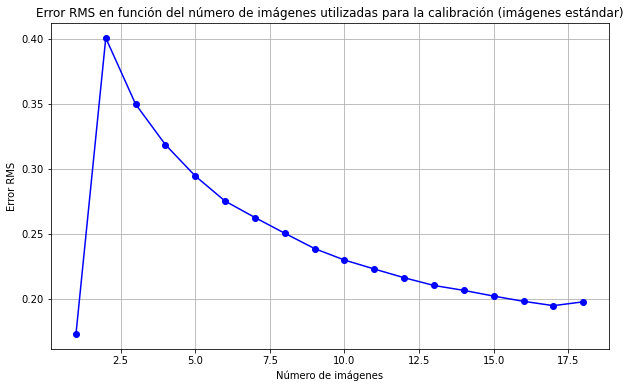

In [28]:
# TODO Homework
import matplotlib.pyplot as plt

rms_values = []

num_imgs = len(valid_corners)

intrinsics = np.zeros((3, 3))
distortion = np.zeros((5, 1))

for i in range(1, num_imgs + 1):
    selected_imgs_corners = valid_corners[:i]
    selected_chessboard_points = chessboard_points[:i]
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        selected_chessboard_points, 
        selected_imgs_corners, 
        (320, 240), 
        intrinsics, 
        distortion
    )
    
    rms_values.append(ret)

plt.figure(figsize=(10,6))
plt.plot(range(1, num_imgs + 1), rms_values, marker='o', color='b')
plt.title('Error RMS en función del número de imágenes utilizadas para la calibración (imágenes estándar)')
plt.xlabel('Número de imágenes')
plt.ylabel('Error RMS')
plt.grid(True)
plt.show()



## **Apartado B: Corrección de distorsión** (ojo de pez)

En este apartado se trabajará en la corrección de la distorsión debido a lentes de ojo de pez. Primero se calibrará una cámara con este tipo de lente, utilizando las imágenes de la carpeta ``fisheye``. Posteriormente se utilizarán estos parámetros de calibración para corregir la distorsión de una de las imágenes de calibración.

Los pasos que deberá seguir para calibrar una cámara con distorsión de ojo de pez son:

1. Reutilice el método ``load_images()`` para cargar las imágenes de la carpeta ``fisheye``.
2. Detecte las equinas procesando las imágenes con los métodos ``cv2.findChessboardCorners()`` y ``cv2.cornerSubPix()``.
3. Reutilice la función ``get_chessboard_points()`` para obtener las coordenadas del tablero.
4. Defina los argumentos para la función de calibración.
5. Calibre con ``cv2.fisheye.calibrate()``

### **Tarea B.1:** Reutilice el método ``load_images()`` para cargar las imágenes de la carpeta ``fisheye``

In [20]:
# TODO Build a list containing the paths of all images from the fisheye camera and load images
path = join(dirname(os.getcwd()), "data", "fisheye")
fisheye_imgs_path = glob.glob(f'{path}/*.jpg')

fisheye_imgs = load_images(fisheye_imgs_path)


In [21]:
for img in fisheye_imgs:
    show_image(img)

### **Tarea B.2:** Detecte las equinas procesando las imágenes con los métodos ``cv2.findChessboardCorners()`` y ``cv2.cornerSubPix()``.

In [22]:
imgs_corners = []
# Parameters for cv2.cornerSubPix()
subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)

#TODO Complete the required parts of the loop
for img in fisheye_imgs:
    
    # TODO parse arguments to cv2.findChessboardCorners()
    show_image(img)
    corners = cv2.findChessboardCorners(img, (7,6))
    print(corners)
    
    # TODO convert image to grayscale to use cv2.cornerSubPix()
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if corners[0]:
        refined_corners = cv2.cornerSubPix(gray_img, corners[1], (3,3), (-1,-1), subpix_criteria)

    # TODO append only those refined_corners with proper detections
    if corners[0]:
        imgs_corners.append(refined_corners)

(True, array([[[858.3202 , 396.44244]],

       [[859.0629 , 441.96042]],

       [[852.1465 , 491.30176]],

       [[834.46124, 542.6442 ]],

       [[806.3825 , 593.19055]],

       [[767.85034, 634.45404]],

       [[725.23346, 666.46014]],

       [[815.64276, 388.95844]],

       [[815.1687 , 429.42566]],

       [[807.4867 , 473.57385]],

       [[790.7452 , 519.8153 ]],

       [[764.66095, 564.4201 ]],

       [[730.91504, 602.2414 ]],

       [[693.456  , 631.3175 ]],

       [[776.01685, 383.20914]],

       [[773.36865, 418.35046]],

       [[764.53467, 456.92105]],

       [[748.7023 , 497.5504 ]],

       [[725.4648 , 536.9222 ]],

       [[695.7257 , 570.6822 ]],

       [[663.83905, 597.74677]],

       [[739.2594 , 378.20114]],

       [[735.16846, 408.4612 ]],

       [[725.6921 , 442.6035 ]],

       [[710.65405, 477.7494 ]],

       [[689.96704, 512.0793 ]],

       [[664.8761 , 542.4253 ]],

       [[637.54266, 567.3744 ]],

       [[706.5791 , 374.2614 ]],

       

### **Tarea B.3:** Reutilice la función ``get_chessboard_points()`` para obtener las coordenadas del tablero

In [23]:
# TODO Define the chessboard dimensions and the lenght of the squares (in [mm])
chessboard_dims = (7, 6)
length = 30 
# TODO You need the points for every image, not just one (consider a list comprehension)
fisheye_chessboard_points = [np.asarray(get_chessboard_points(chessboard_dims, length, length)).reshape(-1,1,3) for _ in range(len(imgs_corners))]

In [24]:
print(len(fisheye_chessboard_points))

10


### **Tarea B.4:** Defina los argumentos para la calibración

In [29]:
# Parameters for cv2.fisheye.calibrate()
# calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW
# intrinsics = np.zeros((3, 3))
# distortion = np.zeros((4, 1))
# rotations = [np.zeros((1, 1, 3), dtype=np.float64) for _ in imgs_corners]
# traslations = [np.zeros((1, 1, 3), dtype=np.float64) for _ in imgs_corners]








def get_chessboard_points(chessboard_shape, dx, dy):
    rows, cols = chessboard_shape
    points = np.zeros((rows*cols,1,3),dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            points[i*cols+j] = [j*dx,i*dy,0]
    
    return points
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_K1 + cv2.fisheye.CALIB_FIX_K2 + cv2.fisheye.CALIB_FIX_K3 + cv2.fisheye.CALIB_FIX_K4


intrinsics = np.zeros((3, 3))
intrinsics[0, 0] = 1.0  # f_x (distancia focal en la dirección x)
intrinsics[1, 1] = 1.0  # f_y (distancia focal en la dirección y)
intrinsics[0, 2] = 1024 / 2  # c_x (centro de la imagen en x)
intrinsics[1, 2] = 768 / 2  # c_y (centro de la imagen en y)
intrinsics[2, 2] = 1.0

distortion = np.zeros((4, 1))  # 4 coeficientes de distorsión

rotations = []  # Se dejan vacíos para que OpenCV los llene

traslations = []  # También se dejan vacíos
imags_corners = [
    np.array(corners).reshape(-1, 1, 2).astype(np.float32) for corners in imgs_corners if corners is not None
]
object_points = [
    np.asarray(get_chessboard_points(chessboard_dims, length, length)).reshape(-1,1,3).astype(np.float32) for _ in range(len(imags_corners))
]


In [26]:
gray_img.shape[::-1]

(1024, 768)

### **Tarea B.5:** Calibración

In [36]:
rms, intrinsics, distortion, rotations, translations = \
cv2.fisheye.calibrate(objectPoints=object_points, imagePoints=imags_corners, image_size=(1024,768), K=intrinsics, D=distortion, flags=calibration_flags, criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))

In [37]:
# Show intrinsic matrix and distortion coefficients values
print(intrinsics)
print(distortion)

[[512.    0.  511.5]
 [  0.  512.  383.5]
 [  0.    0.    1. ]]
[[0.]
 [0.]
 [0.]
 [0.]]


### **Pregunta B.1:** Corrija la distorsión de las 2 primeras imágenes de la carpeta ``fisheye``

In [38]:
# TODO Search in the documentation to define 'dim'
dim = (1024, 768)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(intrinsics, distortion, np.eye(3), intrinsics, dim, cv2.CV_16SC2)

In [39]:
# TODO Homework: correct distortion using cv2.remap()

undistorted_imgs = []
for img in fisheye_imgs[:2]:
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR)
    undistorted_imgs.append(undistorted_img)

    imgs_gray = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(undistorted_img, (7, 6))

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)
        corners_refined = cv2.cornerSubPix(imgs_gray, corners, (7, 6), (-1, -1), criteria)

        cv2.drawChessboardCorners(undistorted_img, (7, 6), corners_refined, ret)

    cv2.imshow("Undistorted Image", undistorted_img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

print("Matriz de intrínsecos:\n", intrinsics)
print("Coeficientes de distorsión:\n", distortion)


Matriz de intrínsecos:
 [[512.    0.  511.5]
 [  0.  512.  383.5]
 [  0.    0.    1. ]]
Coeficientes de distorsión:
 [[0.]
 [0.]
 [0.]
 [0.]]
